In [2]:
import pybdsim
import numpy as np
import matplotlib.pyplot as plt

# for energy in 002 004 006 008 010 050 100 150 200 250 350; 
# do 
# bdsim --file=tm_010_standing_${energy}mev.gmad --outfile=tm_010_standing_${energy}mev --batch --ngenerate=1000 
# done


Welcome to JupyROOT 6.30/06


In [3]:
phi = 0
ei = 1.0
ef = 1.01
l = 0.1
eta = pybdsim.Analysis.CavityBodyEta([0],[1],phi)
alpha = pybdsim.Analysis.CavityBodyAlpha(ei,ef,eta,phi)
cbm  = pybdsim.Analysis.CavityBodyTransverseMatrix(ei,ef,l,alpha,eta,phi)

print(eta,alpha,cbm)


1.0 0.0035179732106624417 [[1 0.0995]
 [-0.000123 0.99]]


In [4]:
def bodyMat(ei = 1.0, ef = 1.05, l=0.1, phi=0) :
    eta = pybdsim.Analysis.CavityBodyEta([0],[1],phi)
    alpha = pybdsim.Analysis.CavityBodyAlpha(ei,ef,eta,phi)
    cbm  = pybdsim.Analysis.CavityBodyTransverseMatrix(ei,ef,l,alpha,eta,phi)
    return cbm

In [80]:
def bdsimMat(energies, files) : 
    mArray = []
    
    for e, file in zip(energies, files):
        m = pybdsim.Analysis.CalculateRMatrix(file,"d1","rf1")
        bdsimE = pybdsim.Analysis.CalculateEnergyGain(file,"d1","rf1")
        mArray.append(m)

        print(e, bdsimE)
    return energies, np.array(mArray)

BDSIM output file - using DataLoader
BDSIM output file - using DataLoader
1.002 0.002000002086162567
BDSIM output file - using DataLoader
BDSIM output file - using DataLoader
1.004 0.003999998569488525
BDSIM output file - using DataLoader
BDSIM output file - using DataLoader
1.006 0.005999998867511749
BDSIM output file - using DataLoader
BDSIM output file - using DataLoader
1.008 0.007999997735023499
BDSIM output file - using DataLoader
BDSIM output file - using DataLoader
1.01 0.01000000011920929
BDSIM output file - using DataLoader
BDSIM output file - using DataLoader
1.02 0.019999997198581695
BDSIM output file - using DataLoader
BDSIM output file - using DataLoader
1.03 0.0299999982714653
BDSIM output file - using DataLoader
BDSIM output file - using DataLoader
1.04 0.03999999380111694
BDSIM output file - using DataLoader
BDSIM output file - using DataLoader
1.05 0.04999999177455902


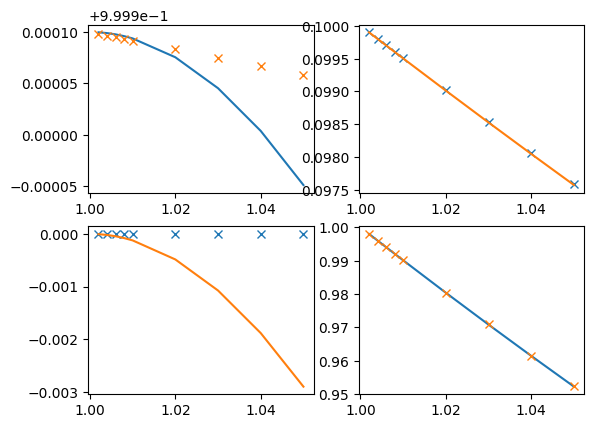

In [90]:
efArray = []
m11 = []
m12 = []
m21 = []
m22 = []


e, bm = bdsimMat([1.002, 1.004, 1.006, 1.008,1.01,1.02, 1.03, 1.04, 1.05],
                    ["tm_011_standing_002mev.root",
                     "tm_011_standing_004mev.root",
                     "tm_011_standing_006mev.root",
                     "tm_011_standing_008mev.root",
                     "tm_011_standing_010mev.root",
                     "tm_011_standing_020mev.root",
                     "tm_011_standing_030mev.root",
                     "tm_011_standing_040mev.root",
                     "tm_011_standing_050mev.root",])

#e, bm = bdsimMat([1.002, 1.004, 1.006, 1.008,1.01],
#                    ["tm_010_standing_002mev.root",
#                     "tm_010_standing_004mev.root",
#                     "tm_010_standing_006mev.root",
#                     "tm_010_standing_008mev.root",
#                     "tm_010_standing_010mev.root"])

for ef in e :
    m = bodyMat(1,ef,0.1,0)
    m11.append(m[0,0])
    m12.append(m[0,1])
    m21.append(m[1,0])
    m22.append(m[1,1])
    efArray.append(ef)

plt.subplot(2,2,1)
plt.plot(efArray,m11)
plt.plot(e,bm[:,0,0],"x")
#plt.plot(e,(bm[:,0,0]-m11)/m11*100,"x")

plt.subplot(2,2,2)
plt.plot(e,bm[:,0,1],"x")
plt.plot(efArray,m12)
#plt.plot(e,(bm[:,0,1]-m12)/m12*100,"x")

plt.subplot(2,2,3)
plt.plot(e,bm[:,1,0],"x")
plt.plot(efArray,m21)
#plt.plot(e,(bm[:,1,0]-m21)/m21*100,"x")

plt.subplot(2,2,4)
plt.plot(efArray,m22)
plt.plot(e,bm[:,1,1],"x")
#plt.plot(e,(bm[:,1,1]-m22)/m22*100,"x")


In [76]:
0.2032898097953903/2000

0.00010164490489769515